## Omar Al-Naimi

### This project is for developing different classification models for predicting patients' readmission within 30 days after discharge.
#### Kansagara and his colleagues conducted systematic review study to examine the regression models for predicting patients’ readmission to hospital. They reviewed 7843 citations. They selected 30 studies of 26 unique models. Most of them used 30-day readmission outcome. The details of the selected literatures were “only 1 model specifically addressed preventable readmissions. Fourteen models that relied on retrospective administrative data could be potentially used to risk-adjust readmission rates for hospital comparison; of these, 9 were tested in large US populations and had poor discriminative ability (c statistic range: 0.55-0.65). Seven models could potentially be used to identify high-risk patients for intervention early during a hospitalization (c statistic range: 0.56-0.72), and 5 could be used at hospital discharge (c statistic range: 0.68-0.83). Six studies compared different models in the same population and 2 of these found that functional and social variables improved model discrimination. Although most models incorporated variables for medical comorbidity and use of prior medical services, few examined variables associated with overall health and function, illness severity, or social determinants of health” (Kansagara, Englander, Salanitro, Kagen, Theobald, Freeman & Kripalani, 2011).
### The conclusion is that developing regression models for hospital readmission is still important topic because there is no one universal model for all scenarios, and most of the developed models showed poor results.
### The approach of this project is to apply all available machine learning classification models after two steps of dimentionality reduction. The first one is experience-based dimentional reduction and the second one is inferential statistics to exclude parameters with high p-value.
Later, machine learning dimentionality reduction techniques were applied to the data subset to reduce the dimentionality to the minimum possible (2D) for visualization. The following dimentionality reduction techniques were used: 
1.Principal Component Analysis (PCA) for linearly separable data
2.Linear Discriminant Analysis (LDA) for linearly separable data
3.Kernel PCA for non-linearly separable data 


### References 
Kansagara, D., Englander, H., Salanitro, A., Kagen, D., Theobald, C., Freeman, M., & Kripalani, S. (2011). Risk prediction models for hospital readmission: a systematic review. Jama, 306(15), 1688-1698.

### Find the data set on the following link https://github.com/al-naimi/SpringBoard-Projects (Hospital-Readmission.csv)

In [181]:
# importing data set = Hospital-Readmission.csv
import pandas as pd
my_dataset = pd.read_csv ('C:\\Users\\omar_\\Desktop\\Springboard DataScience\\Capstone Project\\my 1st project\\project progress\\Data_SecondarySource\\Hospital-Readmission.csv')

In [182]:
#checking my_dataset. it is 10,000 rows and 14 columns
my_dataset.head ()

,RowNumber,PatientInsuranceNO.,Surname,SES-CreditScore,HospitalLocation,Gender,Age,AdmisionPeriod/day,PreviousExpenses,NumOfPrevious admissions,HealthInsurance,RegularCheckup,EstimatedExpenses,Readmited
0,1,15634602,Hargrave,619,Manhattan,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,StatenIsland,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Manhattan,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,Manhattan,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,StatenIsland,Female,43,2,125510.82,1,1,1,79084.10,0


In [183]:
# More checking about data set
rows= len (my_dataset)
columns= len (my_dataset.columns)
print (my_dataset.columns)
print ("Total Rows =", rows, " : Total Columns =", columns)

Index(['RowNumber', 'PatientInsuranceNO.', 'Surname', 'SES-CreditScore',
       'HospitalLocation', 'Gender', 'Age', 'AdmisionPeriod/day',
       'PreviousExpenses', 'NumOfPrevious admissions', 'HealthInsurance',
       'RegularCheckup', 'EstimatedExpenses', 'Readmited'],
      dtype='object')
Total Rows = 10000  : Total Columns = 14


In [184]:
#columns information shows correct data types, numbers, and non-null
my_dataset.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber                   10000 non-null int64
PatientInsuranceNO.         10000 non-null int64
Surname                     10000 non-null object
SES-CreditScore             10000 non-null int64
HospitalLocation            10000 non-null object
Gender                      10000 non-null object
Age                         10000 non-null int64
AdmisionPeriod/day          10000 non-null int64
PreviousExpenses            10000 non-null float64
NumOfPrevious admissions    10000 non-null int64
HealthInsurance             10000 non-null int64
RegularCheckup              10000 non-null int64
EstimatedExpenses           10000 non-null float64
Readmited                   10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


---

In [185]:
# Data description (descriptive statistics) for important numerical columns
# subsetting columns
columns_subset= my_dataset [['Age','SES-CreditScore', 'AdmisionPeriod/day', 'PreviousExpenses', 'NumOfPrevious admissions', \
             'EstimatedExpenses']]
columns_subset.describe ().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
SES-CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
AdmisionPeriod/day,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
PreviousExpenses,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfPrevious admissions,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
EstimatedExpenses,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


---

# A/B test visualization

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams ['figure.figsize'] =8,4
import warnings
warnings.filterwarnings ('ignore')
plt.style.use ("ggplot")

## Creating data subsets & visualize them

In [187]:
# This subset is for gender

male = my_dataset ['Gender'] =='Male'
female = my_dataset ['Gender'] =='Female'
admitted = my_dataset ['Readmited'] == 1
not_admitted = my_dataset ['Readmited'] == 0

male_admitted = my_dataset [male & admitted]
male_not_admitted = my_dataset [male & not_admitted]
female_admitted = my_dataset [female & admitted]
female_not_admitted = my_dataset [female & not_admitted]

In [188]:
# Visualization for gender

vis1 = male_admitted ['Gender'].value_counts()
vis2 = male_not_admitted ['Gender'].value_counts()
vis3 = female_admitted ['Gender'].value_counts()
vis4 = female_not_admitted ['Gender'].value_counts()

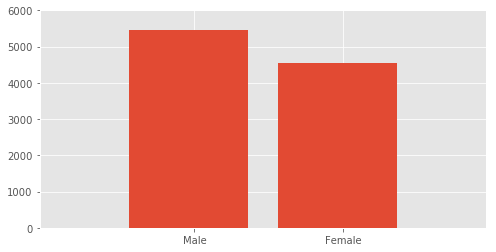

In [189]:
# Comparing the numbers of Males vs Females

plt.style.use ("ggplot")
from collections import Counter
c = Counter(my_dataset.Gender)

men = c['Male']
women = c['Female']

bar_heights = (men, women)
x_axis = (1,2)

fig, ax = plt.subplots()
width = 0.8

ax.bar(x_axis, bar_heights, width)

ax.set_xlim((0, 3))
ax.set_ylim((0, max(men, women)*1.1))

ax.set_xticks([i+width/20 for i in x_axis])
ax.set_xticklabels(['Male', 'Female'])

plt.show()

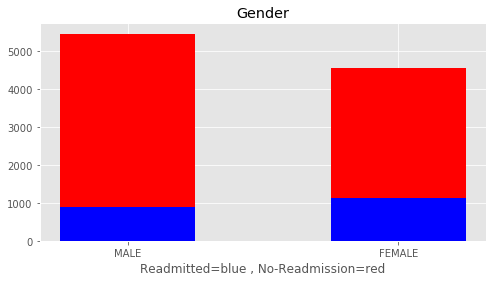

In [190]:
# Visualizing the actual numbers

A = [vis1, vis3]
B = [vis2, vis4]

x_axis = (1,2)

plt.bar(x_axis, A, color = 'b', width= 0.5)
plt.bar(x_axis, B, color = 'r', bottom = A, width= 0.5)

plt.title ('Gender')

plt.xticks ([i+width/20 for i in x_axis])
plt.xlabel ('Readmitted=blue , No-Readmission=red')
plt.xticks(x_axis)
plt.xticks([1, 2], ['MALE', 'FEMALE'])
plt.legend (loc= 1,bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2 )
plt.show()

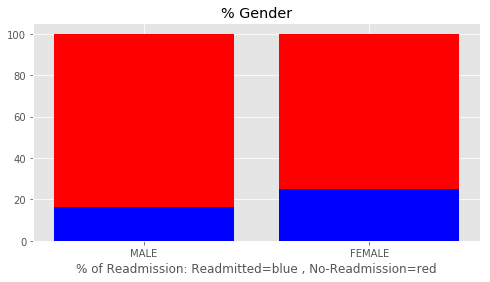

In [191]:
# Visualizing the percent
pool1 = vis1+vis2
vis1p = vis1 *100/pool1
vis2p = vis2*100/pool1
pool2 = vis3 +vis4
vis3p = vis3*100/pool2
vis4p = vis4*100/pool2
A = [vis1p, vis3p]
B = [vis2p, vis4p]

x_axis = (1,2)

plt.title ('% Gender')
plt.bar(x_axis, A, color = 'b')
plt.bar(x_axis, B, color = 'r', bottom = A)
plt.xlabel ('% of Readmission: Readmitted=blue , No-Readmission=red')

plt.xticks ([i+width/20 for i in x_axis])
plt.xticks(x_axis)
plt.xticks([1, 2], ['MALE', 'FEMALE'])
plt.legend (loc= 1,bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2 )

plt.show()

All other parameters can be visualized by the same method above

The full exploratory data analysis was done by Tabluea. Follow this link https://github.com/al-naimi/HospitalReadmission-Project/blob/master/project%20Tabluea%20slides.docx

The project documentation also available on this link https://github.com/al-naimi/HospitalReadmission-Project/blob/master/The%20project%20document.docx

In [192]:
# Machine Learning
""" Data Preprocessing which consist of the following:
1) Importing the libraries.
2) Selecting the important columns of the dataset
3) Creating matrix of features
4) Taking care of missing data
5) Encoding categorical data
6) Splitting the dataset into the Training set and Test set
7) Feature Scaling
8) Fitting the ML model: 
                      a) Fitting classifier to the Training set
                      b) Predicting the Test set results
                      c) Making the Confusion Matrix
                      d) Evaluating the model performance (k-Fold Cross Validation)
9) Model selection includes k-Fold Cross Validation and Grid Search
10) Dimensionality reduction
11) Visualising the Training and Test sets""" 
# 1) Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [193]:
# 2) Importing or selecting the important columns of the dataset
# subsetting columns
dataset = my_dataset [['HospitalLocation', 'Gender', 'Age', 'PreviousExpenses', \
                       'EstimatedExpenses', 'RegularCheckup', 'Readmited']]
dataset.head ()

,HospitalLocation,Gender,Age,PreviousExpenses,EstimatedExpenses,RegularCheckup,Readmited
0,Manhattan,Female,42,0.00,101348.88,1,1
1,StatenIsland,Female,41,83807.86,112542.58,1,0
2,Manhattan,Female,42,159660.80,113931.57,0,1
3,Manhattan,Female,39,0.00,93826.63,0,0
4,StatenIsland,Female,43,125510.82,79084.10,1,0


In [194]:
# 3) creating matrix of features to identify the dependent factor vs independent factors (parameters)
X = dataset.iloc[:, [0, 1, 2, 3, 4, 5]].values  # X = independent factors which are all columns except the last one
y = dataset.iloc[:, 6].values   # y = the dependent factor

In [195]:
X

array([['Manhattan', 'Female', 42, 0.0, 101348.88, 1],
       ['StatenIsland', 'Female', 41, 83807.86, 112542.58, 1],
       ['Manhattan', 'Female', 42, 159660.8, 113931.57, 0],
       ..., 
       ['Manhattan', 'Female', 36, 0.0, 42085.58, 1],
       ['Bronx', 'Male', 42, 75075.31, 92888.52, 0],
       ['Manhattan', 'Female', 28, 130142.79, 38190.78, 0]], dtype=object)

In [196]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [197]:
# 4) Taking care of missing data. Filling the missed data by the mean of the column
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:, 2:5])
X[:, 2:5] = imputer.transform(X[:, 2:5])

In [198]:
# 5) Encoding categorical data

# a) Encoding the Independent Variable/s
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # OneHotEncoder is for dummy encoding the encoded 
                                                              # variable by LabelEncoder
labelencoder_X = LabelEncoder()

X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])

onehotencoder = OneHotEncoder(categorical_features = [[0, 1]])
X = onehotencoder.fit_transform(X).toarray()


# b) Encoding the Dependent Variable. Because it is already encoded, no need for y encoding
# labelencoder_y = LabelEncoder()
# y = labelencoder_y.fit_transform(y)

In [199]:
pd.DataFrame (X).head (10)

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.0,1.0,0.0,42.0,0.00,101348.88,1.0
1,0.0,0.0,1.0,1.0,0.0,41.0,83807.86,112542.58,1.0
2,0.0,1.0,0.0,1.0,0.0,42.0,159660.80,113931.57,0.0
3,0.0,1.0,0.0,1.0,0.0,39.0,0.00,93826.63,0.0
4,0.0,0.0,1.0,1.0,0.0,43.0,125510.82,79084.10,1.0
5,0.0,0.0,1.0,0.0,1.0,44.0,113755.78,149756.71,0.0
6,0.0,1.0,0.0,0.0,1.0,50.0,0.00,10062.80,1.0
7,1.0,0.0,0.0,1.0,0.0,29.0,115046.74,119346.88,0.0
8,0.0,1.0,0.0,0.0,1.0,44.0,142051.07,74940.50,1.0
9,0.0,1.0,0.0,0.0,1.0,27.0,134603.88,71725.73,1.0


In [200]:
# 6) Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # you can ommit random_state. It 
# keeps the same random sample for all sampling trials OR you can choose different value.

In [201]:
# 7) Feature Scaling. This for bringing large and small values of different parameters on the same scale.
""" a) No need to feature scale the y (dependent) variable in binary outcome (logistic regression).Do it when the outcome is
continuous (linear regression).

b) There are 2 feature scaling methods, Standardization and Normalization.
Xstand = X - mean(X) / standard deviation(X)
Xnorm = X - min(X) / max(X) - min(X)

c) Even thought most python and R ML libraries do features scaling for you, some are not and then it is required to do it
manually. It is good practice to include feature scaling code in your script to remind youself this important processing step

d) Important note: feature scaling to dummy independent variables improve the model but loss the interpretation. Whereas, you
should not feature scale the dummy dependant variable"""
 
# Here we will use Standardisation Scale.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) # X_train needs for fit and transform
X_test = sc_X.transform(X_test)       # X_test needs for only transform

# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)
# y_test = sc_y.transform(y_test)

In [202]:
# 8) Fitting classifier to the Training set & Predicting the Test set results

# A) Fitting Logistic Regression to the Training set
# Creating logestic regression class (classifier)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [203]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1534,   61],
       [ 312,   93]])

In [204]:
# Applying k-Fold Cross Validation (evaluating the model performance)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
print (accuracies)
print (accuracies.mean ())
print (accuracies.std ())

[ 0.80774032  0.80649189  0.8025      0.81125     0.82375     0.8075
  0.82125     0.7975      0.79349186  0.81977472]
0.809124879297
0.00955905741613


In [205]:
# B) Fitting KNN to the Training set
# Creating KNN class (classifier)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [206]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1479,  116],
       [ 238,  167]])

In [207]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
print (accuracies)
print (accuracies.mean ())
print (accuracies.std ())

[ 0.82771536  0.80774032  0.8125      0.815       0.805       0.80125
  0.8225      0.8125      0.80350438  0.82853567]
0.813624573046
0.0093200927389


In [208]:
# C) Fitting SVC to the Training set. The assumption is that the data is linearly separable.
# Creating SVC class (classifier)
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [209]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [210]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
print (accuracies)
print (accuracies.mean ())
print (accuracies.std ())

[ 0.79525593  0.79525593  0.79625     0.79625     0.79625     0.79625
  0.79625     0.79625     0.79599499  0.79599499]
0.796000184766
0.000385010370451


In [211]:
# D) Fitting kernel SVC to the Training set. The assumption is that the data is NOT-linearly separable.
# Creating kernel SVC class (classifier)
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [212]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1569,   26],
       [ 307,   98]])

In [213]:
# Model selection includes k-Fold Cross Validation and Grid Search
"""1. Deal with the bias variance tradeoff when building a model and evaluating its performance.
2. Choose the optimal values for the hyperparameters (the parameters that are not learned).
3. Find the most appropriate Machine Learning model for the business problem.

Model Selection techniques including:
1.k-Fold Cross Validation
2.Grid Search"""

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
print (accuracies)
print (accuracies.mean ())
print (accuracies.std ())

[ 0.84269663  0.8289638   0.83125     0.83        0.84        0.825       0.84
  0.82375     0.81977472  0.83979975]
0.832123489255
0.00763807911223


In [214]:
# Applying Grid Search to find the best model and the best parameters. Here is just the code. Excuting the code on many
# independent variables is time and computation comsuming. We will do it after dimentionality reduction.
"""from sklearn.model_selection import GridSearchCV
parameters = [{"C": [1,10,100,1000], 'kernel': ['linear']},
              {"C": [1,10,100,1000], 'kernel': ['rbf'], 'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001]}] #if you get 0.5 as the best
                                                    # then exchange 0.001 and 0.0001 by 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,and 0.9
grid_search = GridSearchCV (estimator = classifier,
                            param_grid = parameters,
                            scoring = 'accuracy',
                            cv = 10,
                            n_jobs = -1)
grid_search = grid_search.fit (X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_"""

'from sklearn.model_selection import GridSearchCV\nparameters = [{"C": [1,10,100,1000], \'kernel\': [\'linear\']},\n              {"C": [1,10,100,1000], \'kernel\': [\'rbf\'], \'gamma\': [0.5, 0.1, 0.01, 0.001, 0.0001]}] #if you get 0.5 as the best\n                                                    # then exchange 0.001 and 0.0001 by 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,and 0.9\ngrid_search = GridSearchCV (estimator = classifier,\n                            param_grid = parameters,\n                            scoring = \'accuracy\',\n                            cv = 10,\n                            n_jobs = -1)\ngrid_search = grid_search.fit (X_train, y_train)\nbest_accuracy = grid_search.best_score_\nbest_parameters = grid_search.best_params_'

In [215]:
# E) Fitting Naive Bayes to the Training set.
# Creating Naive Bayes class (classifier)
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB ()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [216]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1425,  170],
       [ 259,  146]])

In [217]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
print (accuracies)
print (accuracies.mean ())
print (accuracies.std ())

[ 0.79525593  0.79775281  0.78875     0.79        0.7975      0.7925      0.81
  0.7825      0.78222778  0.8097622 ]
0.794624872656
0.00919293677401


In [218]:
# F) Fitting Decision Tree Classification to the Training set. It does not need for features scaling because it is not
# Euclidean-based algorithm.
# Creating Decision Tree Classification class (classifier)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier (criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [219]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1366,  229],
       [ 223,  182]])

In [220]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
print (accuracies)
print (accuracies.mean ())
print (accuracies.std ())

[ 0.76404494  0.75031211  0.7625      0.75125     0.77375     0.72375
  0.75625     0.74625     0.74468085  0.77346683]
0.754625473829
0.0142353640626


In [221]:
# G) Fitting Random Forest Classification to the Training set. It does not need for features scaling because it is not
# Euclidean-based algorithm.
# Creating Random Forest Classification class (classifier)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier (n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [222]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1495,  100],
       [ 265,  140]])

In [223]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
print (accuracies)
print (accuracies.mean ())
print (accuracies.std ())

[ 0.82646692  0.80774032  0.82125     0.80875     0.8075      0.78875
  0.82875     0.8         0.79849812  0.81852315]
0.810622851754
0.0123078160521


In [224]:
"""There are two types of Dimensionality Reduction techniques:
A.Feature Selection:
    1.Backward Elimination
    2.Forward Selection
    3.Bidirectional Elimination
    4.Score Comparison
    5.and more.
B.Feature Extraction:
    1.Principal Component Analysis (PCA) for linearly separable data
    2.Linear Discriminant Analysis (LDA) for linearly separable data
    3.Kernel PCA for non-linearly separable data
    4.Quadratic Discriminant Analysis (QDA)"""

# Applying PCA then repeate all above classifier models.
from sklearn.decomposition import PCA
pca = PCA (n_components = None) # we want to extract 2 independent variables those explain the most variance. Therefore, start
                                 # with 'none' and create Explained Variance vector to identify the top 2 independent variables.
X_train = pca.fit_transform (X_train)
X_test = pca.transform (X_test)
explained_variance = pca.explained_variance_ratio_ # produce new extracted independent variables with principle component
                                                   # for each one of them ordered from the highest
                                                  # (which explain most the variance) to the lowest one.
                                                # It is cumulative with 100% total

explained_variance

array([  2.22683378e-01,   2.03771633e-01,   1.64784688e-01,
         1.20078209e-01,   1.10972338e-01,   1.01437998e-01,
         7.62717551e-02,   6.84629160e-31,   3.32904385e-34])

In [225]:
# Applying PCA with n_components = 2.
from sklearn.decomposition import PCA
pca = PCA (n_components = 2) 
X_train = pca.fit_transform (X_train)
X_test = pca.transform (X_test)
explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([ 0.22268338,  0.20377163])

In [226]:
# The top 2 variables represent about 43%
# Now will apply logestic regression on dimentionality reduction
# Creating logestic regression class (classifier)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

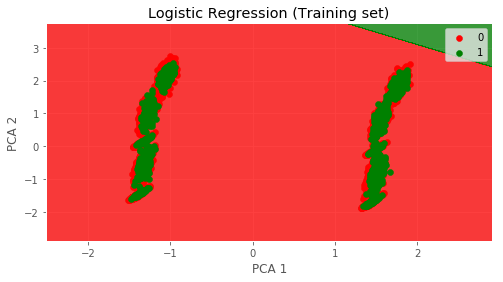

In [227]:
# 9) Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

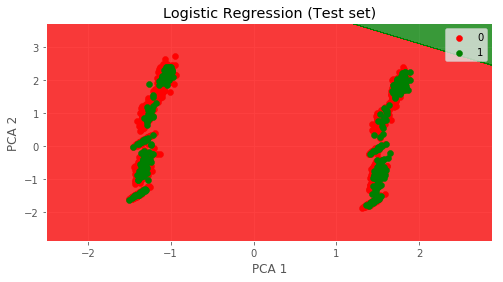

In [228]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [229]:
# Applying kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA (n_components = 2, kernel = 'rbf') 
X_train = kpca.fit_transform (X_train)
X_test = kpca.transform (X_test)

In [230]:
# Creating logestic regression class (classifier)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

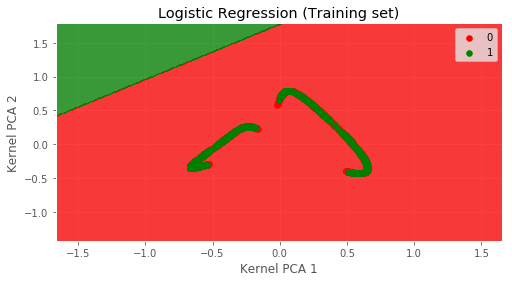

In [233]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Kernel PCA 1')
plt.ylabel('Kernel PCA 2')
plt.legend()
plt.show()

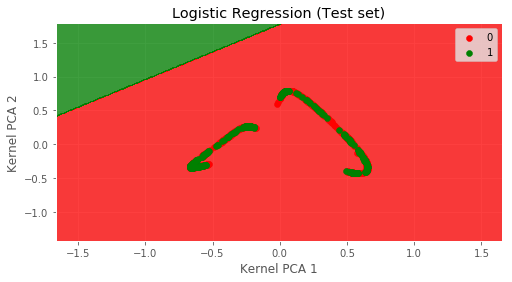

In [232]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Kernel PCA 1')
plt.ylabel('Kernel PCA 2')
plt.legend()
plt.show()

In [247]:
# Applying LDA then repeate all above classifier models.
# LDA extracts p <= n new independent variables those separate the most the classes of the dependent variable.
# Including the dependent variable in LDA makes it a suprevised model.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA (n_components = 2) 
X_train = lda.fit_transform (X_train, y_train) # we added y_train because it is supervised model
X_test = lda.transform (X_test)

# explained_variance = pca.explained_variance_ratio_ # No need for this step because dependant variable has been included.
                                                    # We are not looking for independant variables those explain the most of
                                                   # variance but we are looking for the independant
                                                  # variables those separate the most the classes of the dependent variable.  


In [268]:
# Creating logestic regression class (classifier)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [269]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Kernel PCA 1')
plt.ylabel('Kernel PCA 2')
plt.legend()
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

In [246]:
# Applying PCA then repeate all above classifier models.
from sklearn.decomposition import PCA
pca = PCA (n_components = None) # we want to extract 2 independent variables those explain the most variance. Therefore, start
                                 # with 'none' and create Explained Variance vector to identify the top 2 independent variables.
X_train = pca.fit_transform (X_train)
X_test = pca.transform (X_test)
explained_variance = pca.explained_variance_ratio_ # produce new extracted independent variables with principle component
                                                   # for each one of them ordered from the highest
                                                  # (which explain most the variance) to the lowest one.
                                                # It is cumulative with 100% total

explained_variance



array([ 1.])

In [ ]:
"""# 9) Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Expenses')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Expenses')
plt.legend()
plt.show()"""